# VIOLENCIA DE GÉNERO EN ARGENTINA

## 1) INTRODUCCIÓN 
### 1) 1. CONTEXTO EMPRESARIAL
A lo largo de los años, la situación vulnerable de la muejer en Argentna se está haciendo visible. Por lo que, exponer la cantidad de casos y sus efectos a toda la sociadas, contribuye a la visibilizacion de las mujeres que han sufrido y las que continuarán sufirendo a causa de la desgualdad de género. Además, permitiran avanzar pasos transcendentales en materia de políticas públicas en favor de la igualdad y contra las violencias de género. Generando acciones de corto, mediano y largo plazo sustentadas para la prevención, asistencia integral y protección de aquellas mujeres que atraviesan estas situaciones de violencia. Haciendo hincapie en aquellas. Por lo que, es muy importante analizar que edades son la que mayor cantidad de casos hay y en que provincias. La informacion obtenida corresponde a aquellas comunicaciones recibdad por la Línea 144, en donde las personas que se comunican acceden a dejar sus datos para un adecuado abordaje y seguimiento. Los registros corresponden a tres sedes: Provincia de Buenos Aires, CABA y la sede de gestión nacional. Las preguntas a responder son: - En que provincias se producen más casos? - Cuales son las edades en las que se produce más violencia?

### 1) 2. CONTEXTO ANALÍTICO
Los datos ya se han recopilado y están en uso:
1. El archivo ¨ViolenciaGenero2.0.xlsx" que contiene el historial de los casos de violencia de género en la Argentina desde el 2020.
2. El archivo "HabitantesProvincia.xlsx" que contiene la cantidad de habitantes por provincia que se determinó en el Censo 2022.


### 1) 3. OBJETIVOS 
En este caso, se busca realizar un análisis estadístico y su consecuente compresión de los valores con el fin de determinar las provincias y edades más afectadas.Y, finalmente, crear un modelo para determinar los casos más probables por provincia, edad y vínculo con el agresor y, entonces, predecir los futuros casos y tipos de violencia. 


Por lo tanto, se procederá de la siguiente manera: (1) se analizará los datos actuales y se evaluará las deficiencias; (2)extraer los datos de estas fuentes y realizar una limpieza de datos, EDA e ingeniería de características y (3) crear un modelo predictivo.

## 2) ANÁLISIS DE DATA EXISTENTE
Antes de sumerginos en cualquier proyecto de ciencia de datos, siempre se debe evaluar los datos actuales para comprender que piezas de informacion podrían faltar. En algunos caso, no tendrá datos y tendrá que empezar de cero. En este caso, tenemos dos fuentes de datos diferentes, por lo que debemos analizar cada una de ellas individualmente y todas como un todo para averiguar como exactamente debemos complementarlas. En cada etapa, debemos tener en cuanta nuestro objetivo predecir futuros casos. Es decir, que debemos pensar la siguiente pregunta ¨Que información será útil pare predecir los futuros casos de violencia?¨


##### 2)1: IMPORTAMOS LIBRERIAS Y PAQUETES NECESARIAS

In [1]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

##### 2)2. IMPORTAMOS LA BASE DE DATOS QUE SE ENCUENTRA EN UN ARCHIVO EXCEL

In [2]:
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.3.xlsx', sheet_name='casos')

##### 2) 3. VERFICAMOS SI SE REALIZÓ LA CARGA A PARTIR DE M0STRAR LOS PRIMEROS CINCO DATOS

In [3]:
bd.head(5)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,VIOLENCIA_INSTITUCIONAL,VIOLENCIA_LABORAL,VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,...,0,0,0,0,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,0,0,0,0,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,0,0,0,0,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,0,0,0,0,Pareja,Varon,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,0,0,0,0,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS


##### 2) 4. INSPECCIONAMOS EL DATASET PARA COMPRENDER LOS DATOS QUE TENEMOS

In [6]:
bd.dtypes

FECHA                                     datetime64[ns]
PROVINCIA                                         object
GENERO_PERSONA_SIT_VIOLENCIA                      object
EDAD                                             float64
PAIS_NACIMIENTO                                   object
VIOLENCIA_FISICA                                   int64
VIOLENCIA_PSICOLOGICA                              int64
VIOLENCIA_SEXUAL                                   int64
VIOLENCIA_ECONOMICA                                int64
VIOLENCIA_SIMBOLICA                                int64
VIOLENCIA_DOMESTICA                                int64
VIOLENCIA_INSTITUCIONAL                            int64
VIOLENCIA_LABORAL                                  int64
VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA             int64
VIOLENCIA_OTRAS                                    int64
VINCULO_PERSONA_AGRESORA                          object
GENERO_AGRESOR                                    object
CASO                           

## 3) LIMPIEZA Y TRANSFORMACIÓN DE DATOS

##### 3) 1. CAMBIAMOS EL FORMATO DE LA COLUMNA FECHA A 'DATETIME' 

In [5]:
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')
bd.head()

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,VIOLENCIA_INSTITUCIONAL,VIOLENCIA_LABORAL,VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,...,0,0,0,0,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,0,0,0,0,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,0,0,0,0,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,0,0,0,0,Pareja,Varon,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,0,0,0,0,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS


##### 3) 2. VISUALIZACIÓN DE LOS OUTLIERS Y REMOCIÓN
###### 3) 2.A: VISUALIZACIÓN A TRAVÉS DEL BOXPLOT

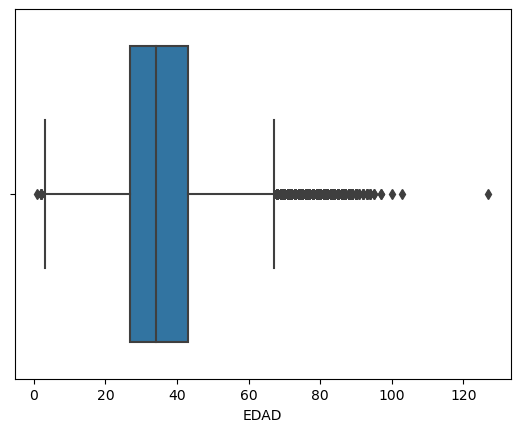

In [7]:
ax=sns.boxplot(x='EDAD', data=bd)

###### 3) 2.B: CÁLCULO ANALÍTICO (puede ser también con la función describe())

In [8]:
Q1=bd['EDAD'].quantile(0.25)
print('Primer cuartil', Q1)

Q3=bd['EDAD'].quantile(0.75)
print('Tercer cuartil', Q3)

IQR=Q3-Q1
print('Rango intercuartil', IQR)

mediana=bd['EDAD'].median()
print('mediana', mediana)

valor_min=bd['EDAD'].min()
print('Valor mínimo', valor_min)

valor_max=bd['EDAD'].max()
print('Valor máximo', valor_max)

Valor_BI=(Q1-1.5*IQR)
print('Valor_BI', Valor_BI)

Valor_BS=(Q3+1.5*IQR)
print('Valor_BS', Valor_BS)

Primer cuartil 27.0
Tercer cuartil 43.0
Rango intercuartil 16.0
mediana 34.0
Valor mínimo 1.0
Valor máximo 127.0
Valor_BI 3.0
Valor_BS 67.0


###### 3) 2.C: ELIMINACIÓN DE OUTLIERS
Con esta función, se detecta el outlier y se intercambia con el valor de la media.

In [9]:
def clean_age(age):
    if age>=Valor_BI and age<=Valor_BS:
        return age
    else:
            return mediana
bd['age_clean'] = bd['EDAD'].apply(clean_age)

# Check out the new column and make sure it looks right

print("'EDADES'")
print("Valor mínimo: ", bd["age_clean"].min())
print("Valor máximo: ", bd["age_clean"].max())

'EDADES'
Valor mínimo:  3.0
Valor máximo:  67.0


###### 3) 2.D: VISUALIZACIÓM DE DATOS SIN OUTLIERS

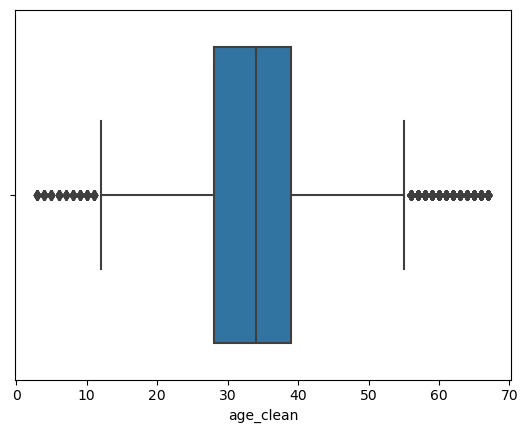

In [10]:
ax=sns.boxplot(x='age_clean', data=bd)

##### 3) 3. LIMPIEZA DE VALORES NaN. REEMPLAZO DE NaN POR MEDIA

In [11]:
bd['age_clean'].fillna(value=mediana, inplace=True)
bd.head(5)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,VIOLENCIA_LABORAL,VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,age_clean
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,...,0,0,0,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,34.0
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,0,0,0,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,39.0
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,0,0,0,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,22.0
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,0,0,0,Pareja,Varon,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,53.0
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,0,0,0,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,38.0


## 4) VISUALIZACIÓN DE LOS DATOS Y BÚSQUEDA DE PATRONES
##### 4) 1. VISUALIZACIÓN DE LA VARIACIÓN DE CANT DE CASOS EN EL TIEMPO
###### 4) 1.A: PARA FACILITAR EL ANÁLISIS AGRUPAMOS LAS FECHAS DE MANERA MENSUAL (no diaria)

In [12]:
bd['FECHA'] = pd.to_datetime(bd['FECHA'], errors='coerce')
bd['FECHA_MES']=bd.FECHA.dt.to_period('M')
bd3=bd.groupby('FECHA_MES', as_index=False).sum()
bd3.head()

C:\Users\garro\AppData\Local\Temp\ipykernel_28048\3724945986.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bd3=bd.groupby('FECHA_MES', as_index=False).sum()


,FECHA_MES,EDAD,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,VIOLENCIA_DOMESTICA,VIOLENCIA_INSTITUCIONAL,VIOLENCIA_LABORAL,VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,VIOLENCIA_OTRAS,CASO,age_clean
0,2020-01,74549.0,1760,2377,340,901,1028,2159,47,30,10,4,2465,84597.0
1,2020-02,60166.0,1384,1916,281,748,805,1723,44,22,8,2,1993,68155.0
2,2020-03,72802.0,1741,2430,287,852,963,2214,27,25,8,1,2550,87665.0
3,2020-04,84145.0,1973,2911,326,994,919,2694,40,24,6,1,2996,103931.0
4,2020-05,80617.0,1863,2732,324,1047,857,2623,44,33,9,3,2875,100033.0


In [13]:
bd3['FECHA_MES'] = bd3['FECHA_MES'].astype('str')

###### 4) 1.B: REALIZAMOS UN GRÁFICO DE LINEAS

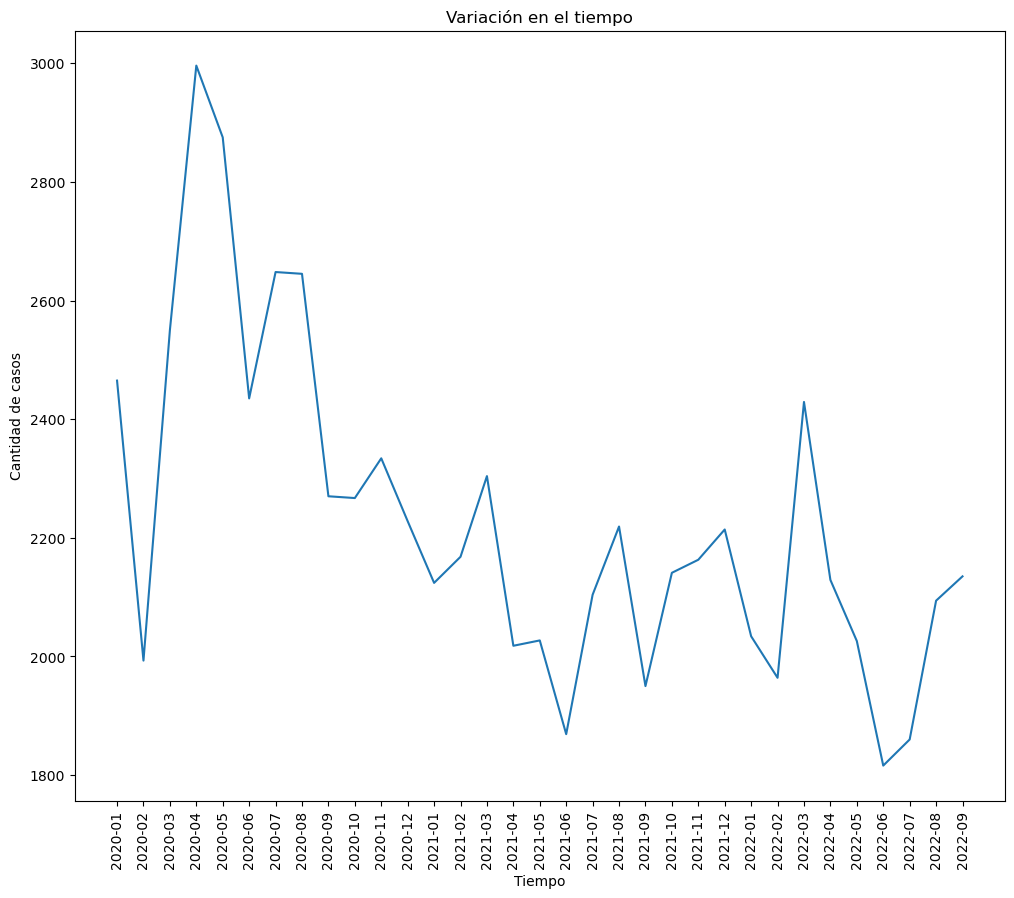

In [14]:
plt.figure(figsize=(12,10))
plt.plot(bd3.FECHA_MES, bd3.CASO)
plt.xticks(rotation = 'vertical')
plt.ylabel('Cantidad de casos')
plt.title('Variación en el tiempo')
plt.xlabel('Tiempo')
plt.show()

###### 4)1.C. PARA FACILITAR MAS EN ANALISI REALIZAMOS UNA GRILLA DE DOS GRAFICOS COMPARANDO EL AÑO 2020 Y 2021. POR LO QUE CREAMOS DOS DATA FRAMES PARA CADA AÑO


In [15]:
bd['FECHA'] = pd.to_datetime(bd['FECHA'], errors='coerce')
bd['FECHA_MES']=bd.FECHA.dt.to_period('M')
bd_2=bd.groupby('FECHA_MES', as_index=False).sum()
bd_2.head()
bd_2['FECHA_MES'] = bd_2['FECHA_MES'].astype('str')
bd_2_2020= bd_2.loc[0:11,['FECHA_MES','CASO']] 
bd_2_2020['FECHA_MES'] = bd_2_2020['FECHA_MES'].astype('str')
bd_2_2020.head()

C:\Users\garro\AppData\Local\Temp\ipykernel_28048\228903854.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bd_2=bd.groupby('FECHA_MES', as_index=False).sum()


,FECHA_MES,CASO
0,2020-01,2465
1,2020-02,1993
2,2020-03,2550
3,2020-04,2996
4,2020-05,2875


In [16]:
bd_2_2021= bd_2.loc[12:23,['FECHA_MES','CASO']] 
bd_2_2021['FECHA_MES'] = bd_2_2021['FECHA_MES'].astype('str')
bd_2_2021.head()

,FECHA_MES,CASO
12,2021-01,2124
13,2021-02,2168
14,2021-03,2304
15,2021-04,2018
16,2021-05,2027


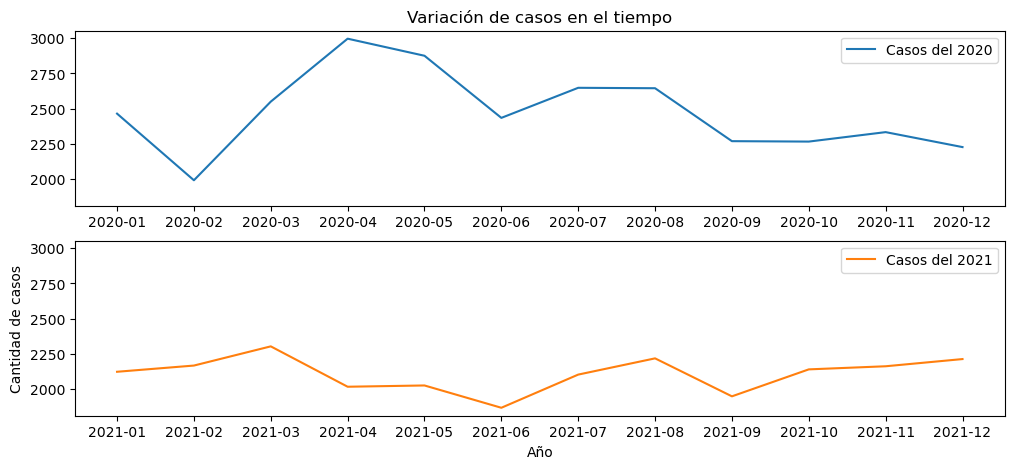

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), sharey=True)  
ax[0].plot(bd_2_2020.FECHA_MES, bd_2_2020.CASO, label='Casos del 2020')
ax[1].plot(bd_2_2021.FECHA_MES, bd_2_2021.CASO, label='Casos del 2021', color='C1')
#ax[2].plot(df.FECHA[2022], df.CASO, label='Precipitaciones de marzo', color='C2')
ax[0].set_title('Variación de casos en el tiempo') 
ax[1].set_xlabel('Año')  
ax[1].set_ylabel('Cantidad de casos')

ax[0].legend()  
ax[1].legend()
#ax[2].legend() 

##### 4) 2. REALIZAMOS UN HISTOGRAMA EN EL QUE PODAMOS ANALIZAR LA DISTRIBUCIÓN DE LAS EDADES EN CADA PROVINCIA

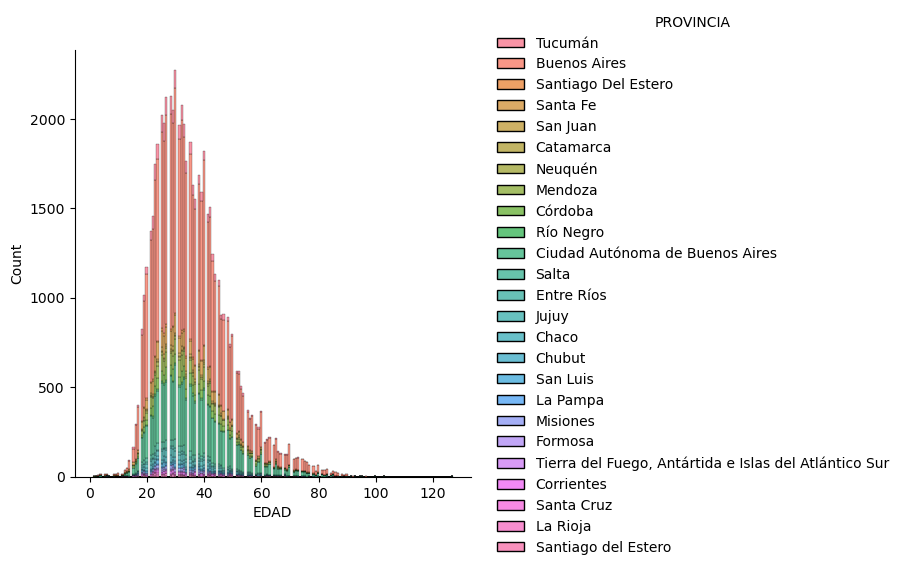

In [18]:
sns.displot(data=bd, x="EDAD", hue="PROVINCIA", multiple="stack")

##### 4) 3. GRÁFICAMOS CANTIDAD DE CASOS POR PROVINCIA:
###### 4) 3.A: CALCULAMOS LA CANTIDAD DE CASOS TOTALES POR PROVINCIA

In [19]:
serie_provincia=bd.PROVINCIA.value_counts()
serie_provincia

Buenos Aires                                             40490
Ciudad Autónoma de Buenos Aires                          14270
Santa Fe                                                  2965
Tucumán                                                   2585
Mendoza                                                   2570
Córdoba                                                   2010
Jujuy                                                     1031
Salta                                                     1019
Chaco                                                      611
San Juan                                                   522
San Luis                                                   521
Entre Ríos                                                 491
Neuquén                                                    474
Misiones                                                   416
Corrientes                                                 402
Río Negro                                              

###### 4) 3.B: GRAFICAMOS

Text(0.5, 0, 'Cantidad de casos')

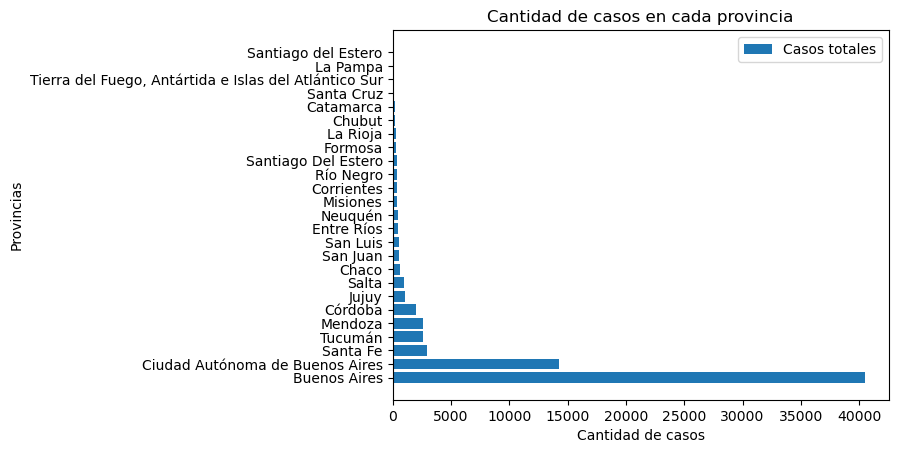

In [20]:
fig, ax= plt.subplots()
ax.barh(serie_provincia.index, serie_provincia, label='Casos totales')
ax.legend(loc='upper right')
ax.set_title('Cantidad de casos en cada provincia')
ax.set_ylabel('Provincias')
ax.set_xlabel('Cantidad de casos')

###### 4)3.C. GENERAMOS UN NUEVO DATA FRAME APLICANDO UN FILTRO DE EDAD Y, ASI, OBTENER LOS CASOS DE VIOLENCIA DE MENORES



##### 4)3.C.1. ARMAMOS RANGOS DE EDADES
    '1': niños (0-5)
    '2':pre-adolescentes(6-12)
    '3': adolescentes (13-18)
    '4': jovenes (19-30)
    '5': adultos (31-60)
    '6': mayores (61-100)

In [22]:
bins=[0,5,12,18,30,60,100]
#names=('0-5','6-12','13-18','19-30','31-60','61-100')
names=('1','2','3','4','5','6')
bd['EDAD']=pd.cut(bd['EDAD'], bins, labels=names)

#### 4)3.C.2. CALCULAMOS CANTIDAD DE CASOS TOTALES POR PROVINCIA

In [25]:
serie_provincia=bd.PROVINCIA.value_counts()
serie_provincia

Buenos Aires                                             40490
Ciudad Autónoma de Buenos Aires                          14270
Santa Fe                                                  2965
Tucumán                                                   2585
Mendoza                                                   2570
Córdoba                                                   2010
Jujuy                                                     1031
Salta                                                     1019
Chaco                                                      611
San Juan                                                   522
San Luis                                                   521
Entre Ríos                                                 491
Neuquén                                                    474
Misiones                                                   416
Corrientes                                                 402
Río Negro                                              

##### 4)3.C.3. GENERAMOS UN NUEVO DATA FRAME APLICANDO UN FILTRO DE EDAD Y, ASI, OBTENER LOS CASOS DE VICTIMAS MENORES DE EDAD

In [26]:
casos_menores= bd.loc[bd['EDAD']<'4'] 
casos_menores

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,age_clean,FECHA_MES
40,2020-01-01,Buenos Aires,Mujer,3,Argentina,0,1,1,0,0,...,0,0,Pareja,NaN,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_SEXUAL,16.0,2020-01
62,2020-01-01,Buenos Aires,Mujer,3,NaN,1,1,0,0,1,...,0,0,"Padre, madre, tutor u otro familiar",Otro,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,18.0,2020-01
90,2020-01-02,Salta,Mujer,3,NaN,1,1,1,0,0,...,0,0,"Padre, madre, tutor u otro familiar",Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_SEXUAL,17.0,2020-01
108,2020-01-02,Buenos Aires,Mujer,3,Argentina,0,1,0,0,0,...,0,0,Otro,Varon,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,18.0,2020-01
207,2020-01-03,Ciudad Autónoma de Buenos Aires,Mujer,3,NaN,0,0,1,0,1,...,0,0,Otro,Varon,1,VIOLENCIA_PSICOLOGICA,0,VIOLENCIA_SEXUAL,16.0,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73386,2022-09-29,Córdoba,Mujer,2,Argentina,0,0,1,0,0,...,0,0,NaN,NaN,1,VIOLENCIA_PSICOLOGICA,0,VIOLENCIA_SEXUAL,12.0,2022-09
73395,2022-09-29,Formosa,Mujer,3,NaN,1,1,1,0,0,...,0,0,NaN,NaN,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_SEXUAL,15.0,2022-09
73422,2022-09-29,Buenos Aires,Mujer,3,NaN,1,1,1,0,1,...,0,0,Otro,Otro,1,VIOLENCIA_FISICA,VIOLENCIA_INSTITUCIONAL,VIOLENCIA_SEXUAL,18.0,2022-09
73442,2022-09-30,Tucumán,Mujer,2,NaN,1,1,0,0,0,...,0,0,Otro,Otro,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,9.0,2022-09


#### 4)3.C.4. OBTENEMOS UNA SERIE DE CANT DE CASOS DE VICTIMAS MENORES DE EDAD POR PROVINCIA

In [27]:
serie_provincia_menores=casos_menores.PROVINCIA.value_counts()
serie_provincia_menores

Buenos Aires                                             1120
Ciudad Autónoma de Buenos Aires                           373
Santa Fe                                                   97
Tucumán                                                    62
Mendoza                                                    60
Córdoba                                                    56
Salta                                                      29
Jujuy                                                      28
Corrientes                                                 19
Formosa                                                    19
Misiones                                                   17
San Luis                                                   16
Entre Ríos                                                 15
Chaco                                                      15
Santiago Del Estero                                        13
Neuquén                                                    10
Río Negr

#### 4)3.C.5. GRAFICAMOS

Text(0.5, 0, 'Provincias')

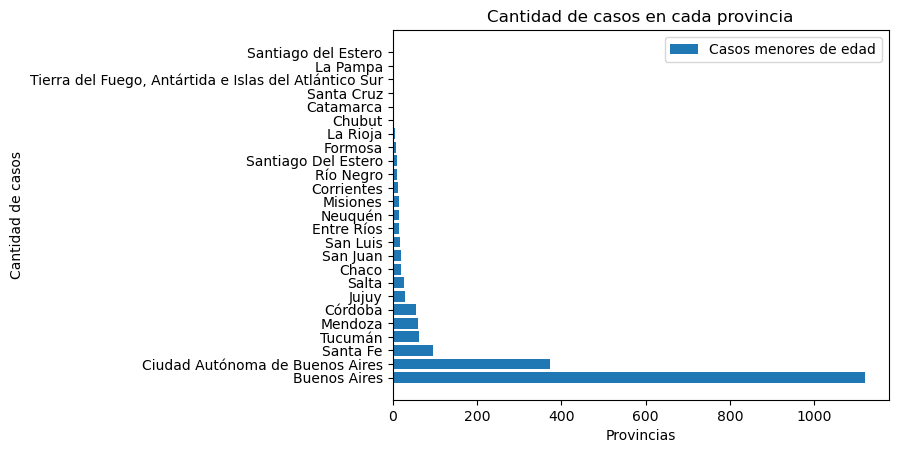

In [29]:
fig, ax= plt.subplots()
#etiquetas=('0-5','6-12','13-18','19-30','31-60','61-100')
ax.barh(serie_provincia.index, serie_provincia_menores, label= 'Casos menores de edad')
ax.legend(loc='upper right')
ax.set_title('Cantidad de casos en cada provincia')
ax.set_ylabel('Cantidad de casos')
ax.set_xlabel('Provincias')

###### 4) 4.: PARA MEJORAR LA VISUALIZACIÓN PODEMOS REALIZAR UNA CATEGORIZACION DE LAS PROVINCIAS EN REGIONES

In [30]:
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['REGION'] = bd['PROVINCIA']

# EN LA NUEVA COLUMNA ASIGNAMOS UNA NUEVA CATEGORIA
PAMPEANA = ['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Córdoba', 'Entre Ríos', 'La Pampa','Santa Fe']
NOA = ['Catamarca', 'Jujuy', 'La Rioja', 'Salta', 'Santiago del Estero', 'Santiago Del Estero', 'Tucumán']
NEA = ['Corrientes', 'Chaco', 'Formosa', 'Misiones'] 
CUYO = ['Mendoza', 'San Luis', 'San Juan']
PATAGONIA = ['Chubut', 'Neuquén', 'Río Negro', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']

bd['REGION'] = bd['REGION'].apply(lambda x:"PAMPEANA" if x in PAMPEANA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"NOA" if x in NOA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"NEA" if x in NEA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"CUYO" if x in CUYO else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"PATAGONIA" if x in PATAGONIA else x)

# CREAMOS UNA SERIE DE LAS REGIONAS CONTANDO LOS CASOS
serie_regiones=bd.REGION.value_counts()
serie_regiones

print(serie_regiones)

PAMPEANA     60295
NOA           5545
CUYO          3613
NEA           1712
PATAGONIA     1257
Name: REGION, dtype: int64


Text(0.5, 0, 'Regiones')

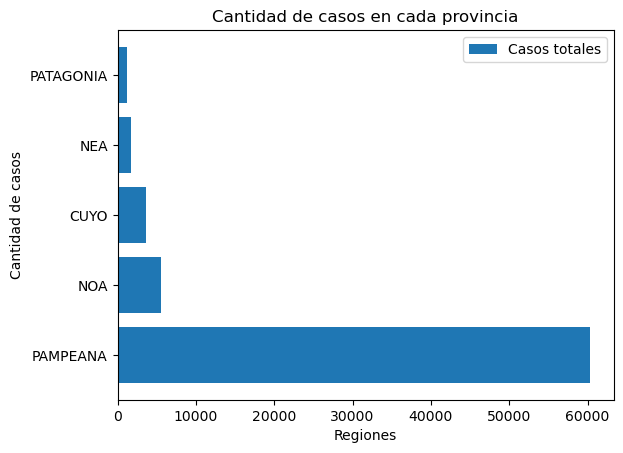

In [31]:
fig, ax= plt.subplots()
ax.barh(serie_regiones.index, serie_regiones, label='Casos totales')
ax.legend(loc='upper right')
ax.set_title('Cantidad de casos en cada provincia')
ax.set_ylabel('Cantidad de casos')
ax.set_xlabel('Regiones')

##### 4) 5. REALIZAMOS UNA ESTADISTICA DE EDADES POR PROVINCIA

Text(0, 0.5, 'Edad')

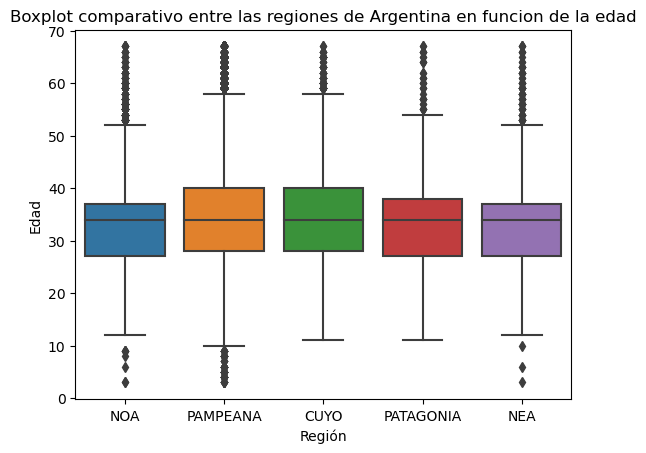

In [33]:
sns.boxplot(x=bd.REGION, y= bd.age_clean)
plt.title('Boxplot comparativo entre las regiones de Argentina en funcion de la edad')
plt.xlabel('Región')
plt.ylabel('Edad')

Por lo tanto, gracias a estos gráficos podemos realizar las primeras conclusiones:

* la mayor cantidad de casos se da en casos con victimas de un rango de edad de entre 27-43 años, siendo la edad en la que se concentra el 50% de los casos a los 34 años
* la provincia con mayor cantidad de casos es Buenos Aires, mientras que la de menor cantidad es La Pampa

##### 4)6. ANALIZAMOS EL TIPO DE VIOLENCIA PARA CADA GRUPO ETARIO

###### 4)6.1. RECORDAMOS QUE HABIAMOS GENERADO UN RANGO DE EDADES
    '1': niños (0-5)
    '2':pre-adolescentes(6-12)
    '3': adolescentes (13-18)
    '4': jovenes (19-30)
    '5': adultos (31-60)
    '6': mayores (61-100)

<Figure size 640x480 with 0 Axes>

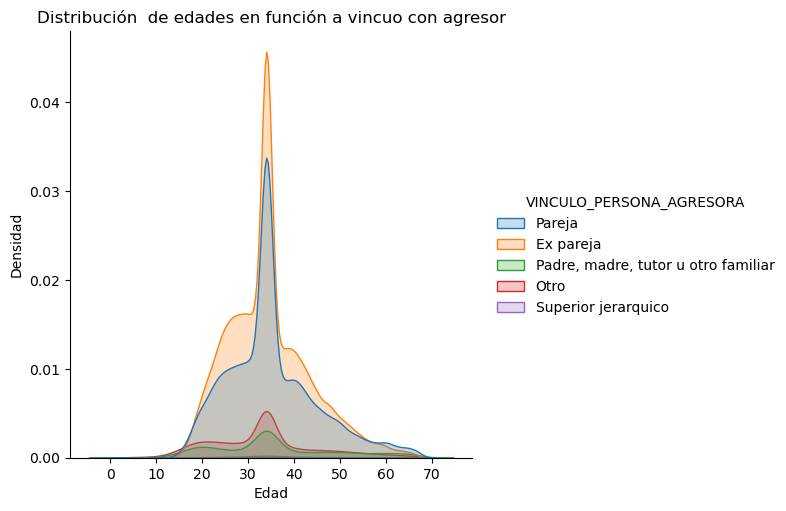

In [54]:
plt.figure()
# Figure -level
ax = sns.displot(data=bd, x='age_clean', kind='kde', hue='VINCULO_PERSONA_AGRESORA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vincuo con agresor')

##### 4)6. DETERMINAMOS LOS TIPOS DE VIOLENCIA QUE OCURREN

In [36]:
tipo_violencia=bd.groupby('TiPO_VIOLENCIA')
cant_tipo=bd.groupby(bd.TiPO_VIOLENCIA)['CASO'].count()
cant_tipo

TiPO_VIOLENCIA
VIOLENCIA_FISICA         48845
VIOLENCIA_PSICOLOGICA    24649
Name: CASO, dtype: int64

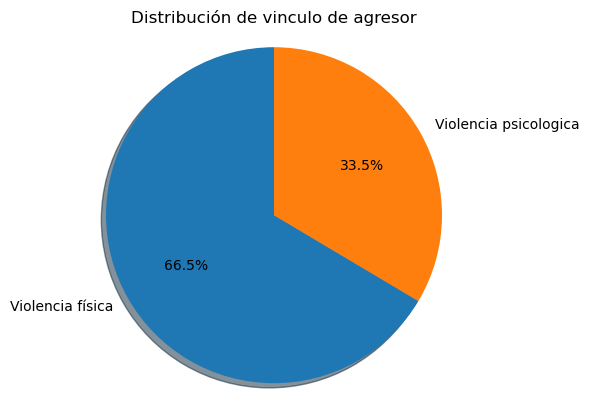

In [38]:
fig1, ax1 = plt.subplots()
#Creamos el grafico, añadiendo los valores
vinculo=['Violencia física', 'Violencia psicologica']
ax1.pie(cant_tipo, labels=vinculo, autopct='%1.1f%%', shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title('Distribución de vinculo de agresor')
#plt.legend()
plt.savefig('grafica_pastel.png')
plt.show()

##### 4)7. DEFINIMOS LOS LUGARES EN LOS QUE SE PRODUCEN VIOLENCIA

In [40]:
lugar=bd.groupby('LUGAR_VIOLENCIA')
cant_lugar=bd.groupby(bd.LUGAR_VIOLENCIA)['CASO'].count()
cant_lugar

LUGAR_VIOLENCIA
0                           5453
VIOLENCIA_DOMESTICA        66775
VIOLENCIA_INSTITUCIONAL      400
VIOLENCIA_LABORAL            866
Name: CASO, dtype: int64

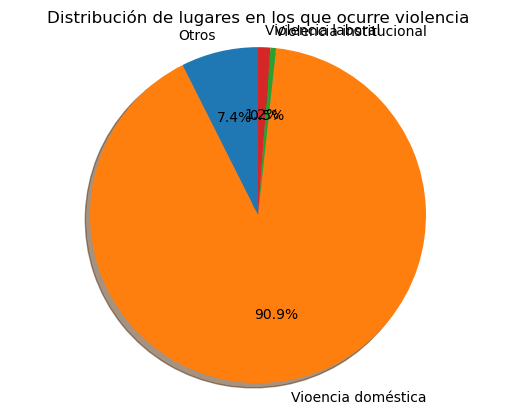

In [46]:
fig2, ax2 = plt.subplots()
#Creamos el grafico, añadiendo los valores
lugares=['Otros', 'Vioencia doméstica', 'Violencia institucional', 'Violencia laboral']
ax2.pie(cant_lugar, labels=lugares, autopct='%1.1f%%', shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax2.axis('equal')
plt.title('Distribución de lugares en los que ocurre violencia')
#plt.legend()
plt.savefig('grafica_pastel.png')
plt.show()

##### 4)8. DEFINIMOS LOS MOTIVOS DE POR QUÉ SE PRODUCEN VIOLENCIA

In [47]:
motivos=bd.groupby('MOTIVO_VIOLENCIA')
cant_motivo=bd.groupby(bd.MOTIVO_VIOLENCIA)['CASO'].count()
cant_motivo

MOTIVO_VIOLENCIA
VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA       51
VIOLENCIA_ECONOMICA                       25164
VIOLENCIA_OTRAS                           38359
VIOLENCIA_SEXUAL                           9920
Name: CASO, dtype: int64

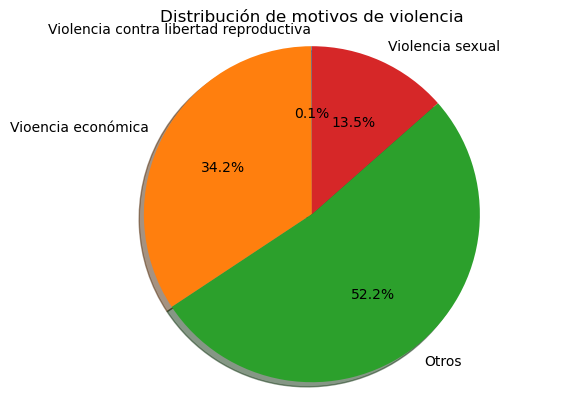

In [51]:
fig3, ax3 = plt.subplots()
#Creamos el grafico, añadiendo los valores
motivos=['Violencia contra libertad reproductiva', 'Vioencia económica', 'Otros', 'Violencia sexual']
ax3.pie(cant_motivo, labels=motivos, autopct='%1.1f%%', shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax3.axis('equal')
plt.title('Distribución de motivos de violencia')
#plt.legend()
plt.savefig('grafica_pastel.png')
plt.show()

## 5) CONCLUSIONES
Usamos las técnicas de correlación para determinar si existía o no una relaciones entre diferentes variables
en los casos de violencia de género. 
En primer lugar, buscamos determinar la cantidad de casos por provincia y cual es su varianza. Esto nos permite definir
cuales son los rangos de edad más vulnerables y en un futuro, enfatizar las acciones legislativas y de asistencia a 
esas edades. En este caso, observamos que el 50% de los casos se acumulaban entre los 27 (25%) a 43 (75%) años, siendo
el 50% los 34 años.
En segundo lugar, realizamos un gráfico de barras que indicaba la cantidad de casos por provincia. Esto permite darnos 
una idea de cuales son las provincias más vulerables y, por lo tanto, crear una mayor cantidad de centros de asistencia
a la mujer. En este caso, observamos que la provincia con mayor cantidad de casos es Buenos Aires,seguida por la provincia de Santa Fe, mientras que la de menor cantidad de asos es La Pampa. 
Luego, para facilitar la visualización de los datos realizamos una categorización de las provincias en regiones (Pampeana,
NOA, NEA, Cuyo y Patagonia).Además, buscamos identificar la media de las edades de las victimas nn cada región. 
En tercer lugar, determinamos la cantidad de casos en función al vinculo del agresor con la víctima y, cuales son las edades
más afectadas en cada tipo de vínculo. Observamos que las victimas cuyo agresor es un familiar (madre, padre, tutor u ptro
familiar) son entre los 11 a 20 años. Mientras que, aquellas en las que el agresor es la pareja o ex pareja son de entre 18 
a 45 años. 
A partir de estas conclusiones, se recomienda:
- tanto en las provincias de Buenos Aires, Santa Fe, Tucumán, Mendoza y Ciudad de Buenos Aires incrementar la cantidad de centros de ayuda para la mujer
- debido a que la media de casos en la región del NOA y NEA son las regiones con una mayor cantidad de casos en menores, se recomienda la creación de talleres en colegios, para fomentar la comunicación de los alumnos con el cuerpo de profesores cuando exista algún caso de violencia. 